In [1]:
#loading important libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import dateutil
import seaborn as sns
sns.set()  #to override matplotlip with beautiful seaborn graphs
%matplotlib inline 

In [18]:
#reading the dataset 
data = pd.read_csv('AirPassengers.csv') 

In [22]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [23]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
data.shape

(144, 2)

In [25]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [26]:
#preprocessing 
data=data.rename(columns = {'Month':'Datetime'})

In [27]:
#data.timestamp = pd.to_datetime(data.Date , format = '%Y-%m') 
data['Datetime'] = data['Datetime'].apply(dateutil.parser.parse, dayfirst=False)

In [28]:
data['Year']=data.Datetime.dt.year
data['Month']=data.Datetime.dt.month_name(locale = 'English')

In [29]:
passenger_pivot_table = data.pivot('Month', 'Year', '#Passengers')
passenger_pivot_table

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


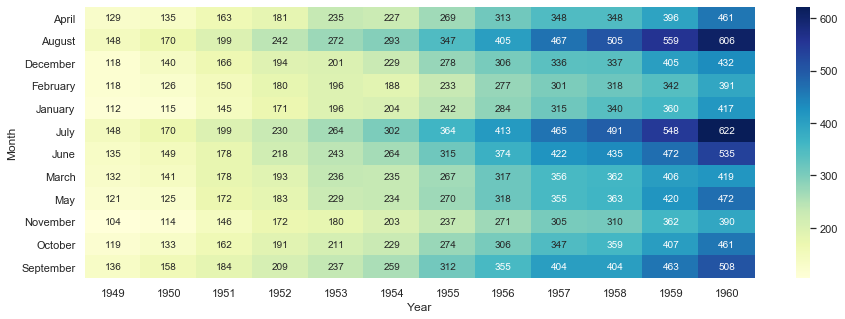

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(passenger_pivot_table,annot=True, fmt='d', cmap= 'YlGnBu')
plt.show()

In [31]:
data['Date'] = data['Datetime'].map(lambda x: x.strftime('%Y-%m'))

In [32]:
data = data.drop('Year', axis=1)
data = data.drop('Month', axis=1)
data = data.drop('Datetime', axis=1)

In [33]:
data.timestamp = pd.to_datetime(data.Date , format = '%Y-%m') 
data.index = data.timestamp 
data.drop('Date',axis = 1, inplace = True) 

C:\Users\NANASEI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [34]:
#looking at the first few rows 
data.head() 

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


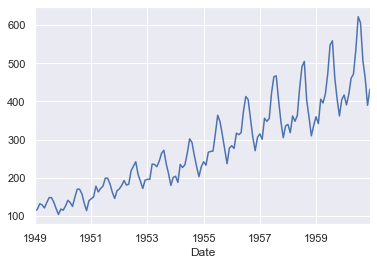

In [35]:
#Visualisevthe data to understand the pattern
data['#Passengers'].plot()

It can be seen from the graph that there is seasonality an trend, thus passenger number increases at a particular time of the year and lowers at another and also the passenger number increases as the years pass by. Therefore the series is not stationary.

Statistics tests are taken below to confirm to this observation.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, model='multiplicative')

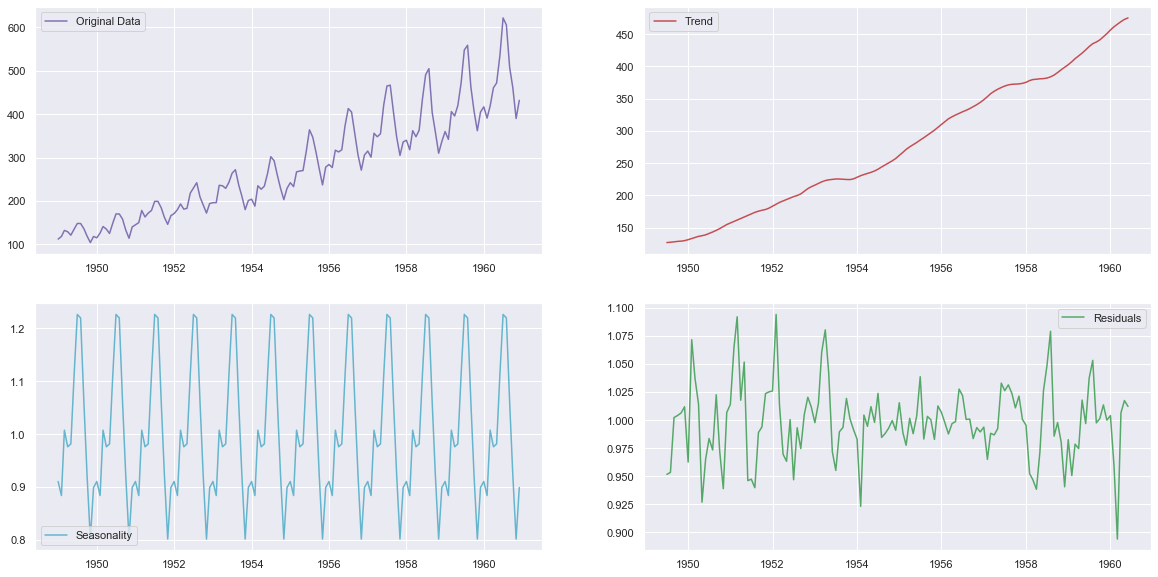

In [55]:
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, 'm',label="Original Data")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'r',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonality, 'c', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'g',label='Residuals')
plt.legend(loc='best')

plt.show()


Statistics test

In [37]:
#define function for ADF test 
from statsmodels.tsa.stattools import adfuller 
def adf_test(timeseries): 
    #Perform Dickey-Fuller test:     
    print('Results of Dickey-Fuller Test:')     
    dftest = adfuller(timeseries, autolag='AIC')     
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])     
    for key,value in dftest[4].items():        
        dfoutput['Critical Value (%s)'%key] = value     
        print (dfoutput) 
#apply adf test on the series  
adf_test(data['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


The test statistic (0.815369) is higher than the critical values. We therefore fail to reject the null hypothesis and for that matter the series is not stationary.

In [38]:
#define function for kpss test 
from statsmodels.tsa.stattools import kpss 
#define KPSS 
def kpss_test(timeseries):    
    print('Results of KPSS Test:')    
    kpsstest = kpss(timeseries, regression='c')    
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])    
    for key,value in kpsstest[3].items():    
        kpss_output['Critical Value (%s)'%key] = value 
        print (kpss_output)

In [39]:
 kpss_test(data['#Passengers'])

Results of KPSS Test:
Test Statistic           1.052175
p-value                  0.010000
Lags Used               14.000000
Critical Value (10%)     0.347000
dtype: float64
Test Statistic           1.052175
p-value                  0.010000
Lags Used               14.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
dtype: float64
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
dtype: float64
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\NANASEI\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\NANASEI\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Since the test statistic is greater than the Critical values, we reject the null hypothesis thus the series is not stationary.

In [57]:
#divide into train and validation set 
train = data[:int(0.7*(len(data)))] 
valid = data[int(0.7*(len(data))):] 

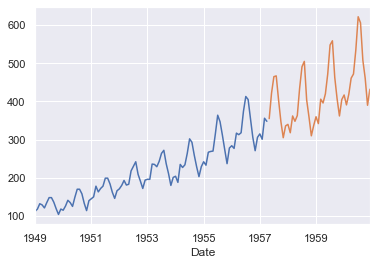

In [58]:
#plotting the data 
train['#Passengers'].plot() 
valid['#Passengers'].plot()

In [59]:
import pmdarima as pm
model = pm.auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=nan sec


C:\Users\NANASEI\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:437: ModelFitWarning: Error fitting  ARIMA(1,1,0)(1,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.39 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=646.172, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=646.337, Time=0.51 sec


C:\Users\NANASEI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=645.887, Time=1.01 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.21 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=646.327, Time=0.71 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=1.16 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=646.321, Time=0.42 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=647.497, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=646.058, Time=0.47 sec

Best model:  ARIMA(0,1,1)(1,1,0)[12]          
Total fit time: 9.289 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      with_intercept=False)

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -319.173
Date:                             Sun, 27 Sep 2020   AIC                            644.346
Time:                                     21:57:40   BIC                            651.743
Sample:                                          0   HQIC                           647.324
                                             - 100                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2511      0.098     -2.575      0.010      -0.442      -0.060
ar.S.L12      -0.2138      0.090     -2.377      0.017      -0.390      -0.038
sigma2        89.3171     14.080      6.344      0.000      61.721     116.913
===================================================================================
Ljung-Box (Q):                       41.70   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.40   Prob(JB):                         0.26
Heteroskedasticity (H):               1.31   Skew:                             0.42
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

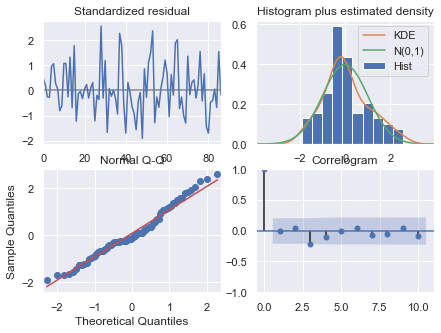

In [61]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [70]:
prediction, confint = model.predict(n_periods=len(valid), return_conf_int=True)

#prediction  = model.predict(n_periods=len(valid)) 
prediction = pd.DataFrame(prediction,index = valid.index,columns=['Prediction']) 

In [72]:
# make series for plotting purpose
#fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=valid.index)
upper_series = pd.Series(confint[:, 1], index=valid.index)

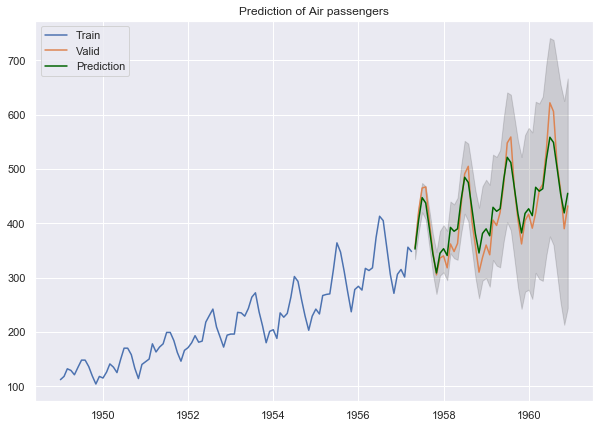

In [75]:
# Plot
plt.figure(figsize=(10,7))
plt.plot(train, label='Train') 
plt.plot(valid, label='Valid') 
plt.plot(prediction,  color='darkgreen',label='Prediction') 
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left')
plt.title("Prediction of Air passengers")
plt.show()

# MODEL EVALUATION

In [66]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
mean_absolute_percentage_error(valid, prediction)

5.122767356233728

The Mean Absolute Percentage Error at 5.1 indicates that the model is 94.9% accurate in making 44 predictions

In [64]:
from sklearn.metrics import r2_score
r2_score(valid, prediction)

0.8841387693518812

The r2 score says, there is 88% correlation lies between the valid data and the predicted data

In [76]:
# Forecast passenger numbers for the next 2 years
n_periods = 24


forecast, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = np.arange(len(data['#Passengers']), len(data['#Passengers'])+n_periods)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

In [77]:

# make series for plotting purpose
forecast_series = pd.Series(forecast, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

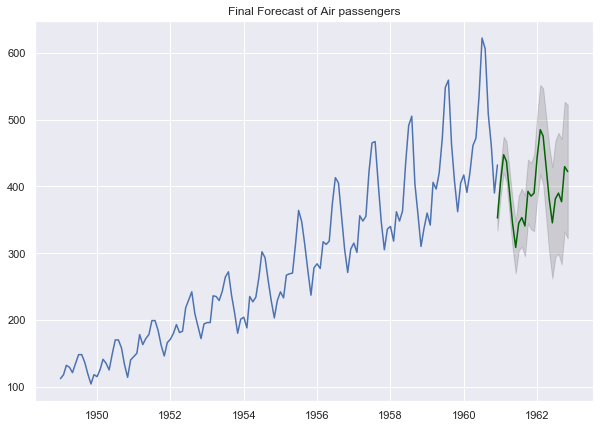

In [80]:
# Plot
plt.figure(figsize=(10,7))
plt.plot(data, label='Actual') 
plt.plot(forecast_series,  color='darkgreen',label='Forecast') 
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title("Final Forecast of Air passengers")
plt.show()

In [81]:
forecast_series

1960-12-01    352.546658
1961-01-01    406.194874
1961-02-01    447.332859
1961-03-01    437.408672
1961-04-01    390.615651
1961-05-01    343.967435
1961-06-01    308.539838
1961-07-01    344.822630
1961-08-01    353.181234
1961-09-01    340.677824
1961-10-01    392.470845
1961-11-01    385.326039
1961-12-01    389.969621
1962-01-01    444.120645
1962-02-01    484.801533
1962-03-01    475.288734
1962-04-01    427.810065
1962-05-01    380.659041
1962-06-01    345.322864
1962-07-01    381.331396
1962-08-01    389.827130
1962-09-01    377.003751
1962-10-01    429.482420
1962-11-01    422.154775
Freq: MS, dtype: float64